# Time Series forecasting with an Exponential Smoothing Model

In [2]:
# Imports
import sys
import os
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import mape
import matplotlib.pyplot as plt

# To import the main.py file
sys.path.append('../')
from python_files import main

# Getting all the data
confirmed_global, deaths_global, recovered_global, country_cases = main.collect_data()

In [3]:
# Setting up plotly to work offline and in jupyter notebooks
pyo.init_notebook_mode(connected = True)
%matplotlib inline

In [4]:
pd.options.display.float_format = '{:.5f}'.format

In [15]:
def predict(country_name):
    cases = main.get_new_cases(country_name)
    is_0 = cases['cases'] != 0
    cases = cases[is_0]
    split_ratio = 0.8
    train_size = int(split_ratio * len(cases))
    train_df, test_df = cases.iloc[:train_size, :], cases.iloc[train_size:, :]
    train, test = TimeSeries.from_dataframe(train_df, 'date', 'cases'), TimeSeries.from_dataframe(test_df, 'date', 'cases')
    time_series = TimeSeries.from_dataframe(cases, 'date', 'cases')
    model = ExponentialSmoothing(trend = 'mul', seasonal = 'add', seasonal_periods = 2)
    model.fit(train)
    prediction = model.predict(len(test) + 30)
    pred_df = TimeSeries.pd_dataframe(prediction)
    pred_df['date'] = pred_df.index
    pred_df.index = [x for x in range(len(pred_df))]
    pred_df.rename(columns = {0: 'cases'}, inplace = True)
    pred_df['date'] = pd.to_datetime(pred_df['date'],unit='ms')
    print(pred_df)
    time_series.plot(label='actual', lw=3)
    prediction.plot(label='forecast', lw=3)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Cases')
    err = mape(test, prediction)
    print(err)
    return pred_df

           cases       date
0   508243.94998 2020-06-26
1   526650.90537 2020-06-27
2   545632.35838 2020-06-28
3   565213.58863 2020-06-29
4   585406.19750 2020-06-30
..           ...        ...
62 3908657.26919 2020-08-27
63 4033862.56275 2020-08-28
64 4162996.61824 2020-08-29
65 4296190.06420 2020-08-30
66 4433563.15965 2020-08-31

[67 rows x 2 columns]
0.8419483778844213


1820061.095513972

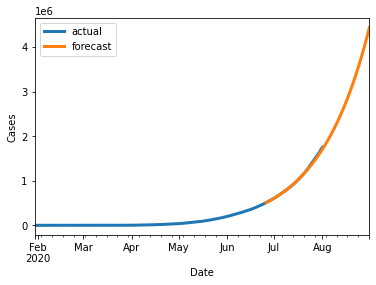

In [19]:
predict('India').at[38, 'cases']

           cases       date
0  2383022.07719 2020-06-24
1  2419026.74339 2020-06-25
2  2455385.21646 2020-06-26
3  2492226.41039 2020-06-27
4  2529431.08157 2020-06-28
..           ...        ...
64 5764828.35077 2020-08-27
65 5839927.15764 2020-08-28
66 5915831.70496 2020-08-29
67 5992676.13114 2020-08-30
68 6070346.47738 2020-08-31

[69 rows x 2 columns]
6.370347457092246


4087371.6222390956

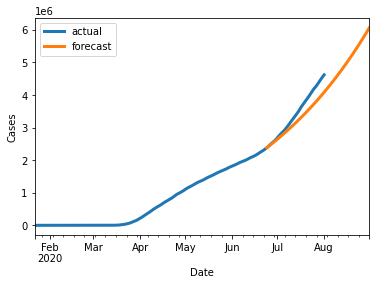

In [20]:
predict('US').at[38, 'cases']

        cases       date
0  7584.96485 2020-06-25
1  7619.58895 2020-06-26
2  7649.36585 2020-06-27
3  7684.16719 2020-06-28
4  7714.12182 2020-06-29
..        ...        ...
63 9796.19612 2020-08-27
64 9831.96327 2020-08-28
65 9872.77133 2020-08-29
66 9908.74923 2020-08-30
67 9949.76861 2020-08-31

[68 rows x 2 columns]
22.311395492296647


,cases,date
0,7584.96485,2020-06-25
1,7619.58895,2020-06-26
2,7649.36585,2020-06-27
3,7684.16719,2020-06-28
4,7714.12182,2020-06-29
...,...,...
63,9796.19612,2020-08-27
64,9831.96327,2020-08-28
65,9872.77133,2020-08-29
66,9908.74923,2020-08-30


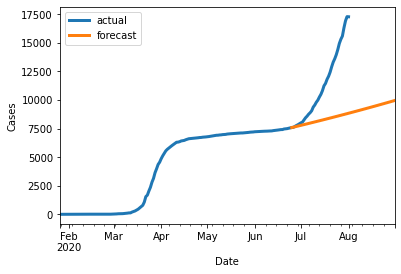

In [21]:
predict('Australia')